# REVIEW DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("breathing_waveform_data.csv").iloc[:, :-1] # get rid of last column ("notes")

In [3]:
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

In [4]:
columns = np.array(X.columns.astype(int))

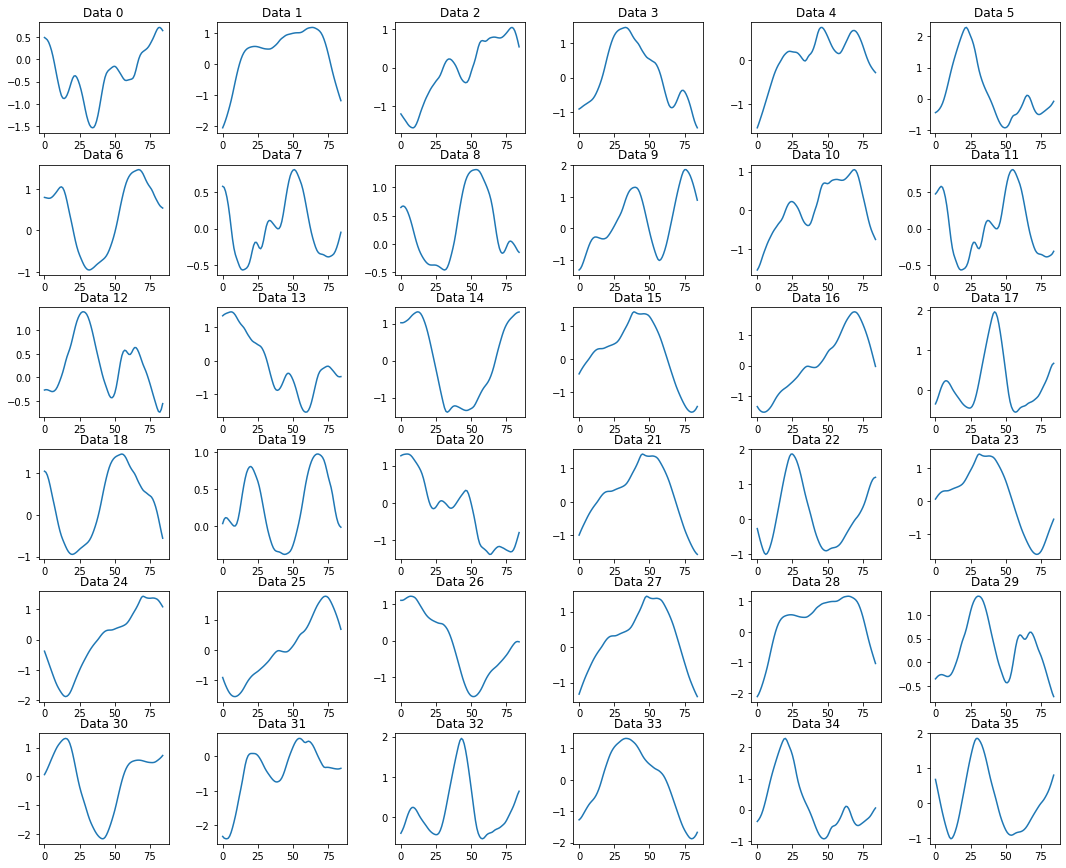

In [5]:
d = 6
figure, axis = plt.subplots(d, d, figsize=(15,12))
figure.tight_layout()

for y in range(d):
    for x in range(d):
        axis[y, x].plot(columns, np.array(X.iloc[y*d+x, :]))
        axis[y, x].set_title("Data {}".format(y*d+x))

plt.show()

In [6]:
Y.value_counts()

normal        19734
quick          2667
hold           2133
deep           1066
deep_quick      800
Name: labels, dtype: int64

# TRY MFCC

In [7]:
import librosa
import librosa.display
import IPython.display as ipd
import os
import numpy as np

In [8]:
for file in os.listdir('audio/'):
    print(file)

hello darkness.mp3


In [9]:
def fe_mfcc(audio_file):
    # load the audio file
    x, sample_rate = librosa.load(audio_file, res_type='kaiser_fast')
    # feature extraction using MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=x, sr=sample_rate, n_mfcc=50).T, axis=0)
    
    return mfcc

In [13]:
# Extract Feature from Audio
features = []
dir = 'audio/'
for audio in os.listdir(dir):
    audio_path = dir+audio
    features.append(fe_mfcc(audio_path))

In [14]:
features[0]

array([-3.3865695e+02,  1.2276149e+02, -2.8274090e+01,  3.1551313e+01,
        1.1419963e+01,  5.6042833e+00, -9.4858446e+00,  8.0032749e+00,
       -7.3797665e+00,  9.8118353e-01, -9.0121431e+00, -2.2360258e+00,
       -1.3470115e+01, -3.5957935e-01, -5.9355516e+00, -9.7937822e+00,
       -1.4773407e+01, -5.0604901e+00, -7.9399128e+00, -4.2771521e+00,
       -7.3088312e+00, -2.9226062e+00, -4.4275546e+00, -5.8595343e+00,
       -9.5424299e+00, -3.2653902e+00, -1.8396157e+00, -7.2313848e+00,
       -7.0983262e+00, -4.6610856e+00,  1.4778008e+00,  1.4514354e+00,
       -8.2733172e-01, -1.4714286e+00,  5.8683246e-01,  2.2762282e+00,
        4.3866129e+00,  3.3323984e+00,  4.3029876e+00,  6.7918105e+00,
       -1.0889148e-01, -3.0649953e+00,  4.7353377e+00,  6.6517262e+00,
        4.4336329e+00,  2.9334238e+00,  4.3696432e+00,  2.9701626e+00,
        2.1431646e+00,  7.9212255e+00], dtype=float32)

In [ ]:
x, sample_rate = librosa.load(audio_path, res_type='kaiser_fast')

In [ ]:
x.shape

In [ ]:
plt.ylim(-1,1)
plt.plot(range(0, x.shape[0]), x)

In [ ]:
sample_rate

In [ ]:
mfcc = np.mean(librosa.feature.(y=x, sr=sample_rate, n_mfcc=50).T, axis=0)